In [1]:
%matplotlib inline
import string
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick',labelsize=14)
matplotlib.rc('ytick',labelsize=14)
from nltk.corpus import stopwords
import nltk

In [2]:
with open("./full_Set.txt") as f:
    content=f.readlines()

In [3]:
content[0:10]

['So there is no way for me to plug it in here in the US unless I go by a converter.\t0\n',
 'Good case, Excellent value.\t1\n',
 'Great for the jawbone.\t1\n',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0\n',
 'The mic is great.\t1\n',
 'I have to jiggle the plug to get it to line up right to get decent volume.\t0\n',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0\n',
 'If you are Razr owner...you must have this!\t1\n',
 'Needless to say, I wasted my money.\t0\n',
 'What a waste of money and time!.\t0\n']

In [4]:
content=[x.strip() for x in content]

In [5]:
sentences=[x.split("\t")[0] for x in content]
labels=[x.split("\t")[1] for x in content]

In [6]:
sentences[0:10]

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case, Excellent value.',
 'Great for the jawbone.',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
 'The mic is great.',
 'I have to jiggle the plug to get it to line up right to get decent volume.',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
 'If you are Razr owner...you must have this!',
 'Needless to say, I wasted my money.',
 'What a waste of money and time!.']

In [7]:
labels[0:10]

['0', '1', '1', '0', '1', '0', '0', '1', '0', '0']

In [8]:
# convert label to -1,1 representation
y=np.array(labels,dtype='int8')
y=2*y-1

In [9]:
def removestopwords(stopwords,txt):
    newtext=' '.join([word for word in txt.split() if word not in stopwords])
    return newtext

In [10]:
stopper=['a','is','of','the','this','uhm','uh']

In [11]:
removestopwords(stopper,"this is a test of stop words removal")

'test stop words removal'

In [17]:
def full_remove(x,removal_list):
    for w in removal_list:
        x=x.replace(w,' ')
        #print(x.replace(w,' '),"removed")
    return x

In [13]:
digits = [str(x) for x in range(10)]
digits

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [18]:
remove_digits=[full_remove(x,digits) for x in sentences]

In [19]:
remove_punc=[full_remove(x,list(string.punctuation))for x in remove_digits]

In [20]:
sent_lower=[x.lower() for x in remove_punc]
sent_lower=[x.strip() for x in sent_lower]

In [23]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MACHINE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
stops=stopwords.words("English")

In [25]:
def removestopwords(stopword,txt):
    newtxt=' '.join([word for word in txt.split() if word not in stopword])
    return newtxt

In [26]:
sents_processed=[removestopwords(stops,x) for x in sent_lower]

In [27]:
sents_processed[0:20]

['way plug us unless go converter',
 'good case excellent value',
 'great jawbone',
 'tied charger conversations lasting minutes major problems',
 'mic great',
 'jiggle plug get line right get decent volume',
 'several dozen several hundred contacts imagine fun sending one one',
 'razr owner must',
 'needless say wasted money',
 'waste money time',
 'sound quality great',
 'impressed going original battery extended battery',
 'two seperated mere ft started notice excessive static garbled sound headset',
 'good quality though',
 'design odd ear clip comfortable',
 'highly recommend one blue tooth phone',
 'advise everyone fooled',
 'far good',
 'works great',
 'clicks place way makes wonder long mechanism would last']

In [30]:
stop_set = ['the', 'a', 'an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from']
sents_processed = [removestopwords(stop_set,x) for x in sent_lower]

In [31]:
sents_processed[0:20]

['so there is no way for me plug in here in us unless go by converter',
 'good case excellent value',
 'great for jawbone',
 'tied charger for conversations lasting more than minutes major problems',
 'mic is great',
 'have jiggle plug get line up right get decent volume',
 'if you have several dozen or several hundred contacts then imagine fun sending each them one by one',
 'if you are razr owner you must have this',
 'needless say wasted my money',
 'what waste money and time',
 'and sound quality is great',
 'was very impressed when going original battery extended battery',
 'if two were seperated by mere ft started notice excessive static and garbled sound headset',
 'very good quality though',
 'design is very odd as ear clip is not very comfortable at all',
 'highly recommend for any one who has blue tooth phone',
 'advise everyone do not be fooled',
 'so far so good',
 'works great',
 'clicks into place in way that makes you wonder how long that mechanism would last']

In [32]:
def stem_with_porter(words):
    porter = nltk.PorterStemmer()
    new_words = [porter.stem(w) for w in words]
    return new_words

In [33]:
porter = [stem_with_porter(x.split()) for x in sents_processed]
porter = [" ".join(i) for i in porter]
porter[0:10]

['so there is no way for me plug in here in us unless go by convert',
 'good case excel valu',
 'great for jawbon',
 'tie charger for convers last more than minut major problem',
 'mic is great',
 'have jiggl plug get line up right get decent volum',
 'if you have sever dozen or sever hundr contact then imagin fun send each them one by one',
 'if you are razr owner you must have thi',
 'needless say wast my money',
 'what wast money and time']

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = CountVectorizer(analyzer = "word", 
                             preprocessor = None, 
                             stop_words =  'english', 
                             max_features = 6000, ngram_range=(1,5))
data_features = vectorizer.fit_transform(sents_processed)
tfidf_transformer = TfidfTransformer()
data_features_tfidf = tfidf_transformer.fit_transform(data_features)
data_mat = data_features_tfidf.toarray()

In [35]:
np.random.seed(0)
test_index = np.append(np.random.choice((np.where(y==-1))[0], 250, replace=False), np.random.choice((np.where(y==1))[0], 250, replace=False))
train_index = list(set(range(len(labels))) - set(test_index))
train_data = data_mat[train_index,]
train_labels = y[train_index]
test_data = data_mat[test_index,]
test_labels = y[test_index]


In [37]:
from textblob import TextBlob
#Create polarity function and subjectivity function
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
pol_list = [pol(x) for x in sents_processed]
sub_list = [sub(x) for x in sents_processed]


In [39]:
pol_list

[0.0,
 0.85,
 0.8,
 0.1875,
 0.8,
 0.22619047619047616,
 0.09999999999999999,
 0.0,
 -0.35,
 -0.2,
 0.6000000000000001,
 0.6875,
 0.037500000000000006,
 0.9099999999999999,
 -0.18525641025641026,
 0.08,
 0.0,
 0.39999999999999997,
 0.8,
 -0.025,
 0.0,
 0.7,
 0.5,
 0.13636363636363635,
 0.0,
 0.8,
 1.0,
 0.0,
 0.0,
 0.0,
 -0.09375,
 0.515,
 0.0,
 -0.10000000000000002,
 0.5,
 -0.016666666666666663,
 0.2,
 -0.4,
 0.6083333333333334,
 -0.8,
 0.575,
 -0.5,
 0.44285714285714284,
 0.0,
 1.0,
 0.0,
 0.2857142857142857,
 0.0,
 0.0,
 -0.75,
 -0.025,
 0.7,
 0.16666666666666666,
 0.23214285714285715,
 0.5,
 0.30833333333333335,
 -0.9750000000000001,
 0.8,
 0.7,
 -0.6999999999999998,
 0.0,
 0.4575,
 0.29333333333333333,
 0.0,
 0.04722222222222222,
 -0.1,
 0.0,
 0.4666666666666666,
 0.8,
 0.4,
 0.0,
 -0.10833333333333334,
 0.8,
 0.6,
 0.85,
 0.5,
 -0.5,
 0.30625,
 0.64,
 0.0,
 0.0,
 -0.35,
 0.0,
 0.08888888888888886,
 0.8,
 0.43333333333333335,
 0.8,
 -0.4,
 0.75,
 0.3333333333333333,
 0.325,
 0.2,


In [40]:
sub_list

[0.0,
 0.8,
 0.75,
 0.3333333333333333,
 0.75,
 0.6011904761904762,
 0.06666666666666667,
 0.0,
 0.5,
 0.0,
 0.575,
 0.875,
 0.7,
 0.7800000000000001,
 0.4701923076923077,
 0.31999999999999995,
 0.0,
 0.8,
 0.75,
 0.23333333333333334,
 0.0,
 0.8,
 0.5,
 0.45454545454545453,
 0.0,
 0.75,
 0.3,
 0.0,
 0.0,
 0.0,
 0.4285714285714286,
 1.0,
 0.0,
 0.4666666666666666,
 0.8888888888888888,
 0.3444444444444445,
 0.3,
 0.6,
 0.625,
 0.9,
 0.7208333333333333,
 1.0,
 0.7678571428571428,
 1.0,
 1.0,
 0.0,
 0.5357142857142857,
 0.0,
 0.0,
 0.75,
 0.65,
 0.6000000000000001,
 0.13333333333333333,
 0.7142857142857143,
 0.6,
 0.55,
 0.9750000000000001,
 0.75,
 0.7,
 0.6666666666666666,
 0.3,
 0.7125,
 0.35666666666666663,
 0.6,
 0.3638888888888889,
 0.1,
 0.25,
 0.6,
 0.75,
 0.375,
 0.0,
 0.30277777777777776,
 0.75,
 1.0,
 1.0,
 0.6,
 0.9,
 0.625,
 0.8,
 0.0,
 0.44999999999999996,
 0.6000000000000001,
 0.0,
 0.3944444444444445,
 0.75,
 0.8333333333333334,
 0.75,
 0.6,
 0.75,
 0.6666666666666666,
 0.55

In [41]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB().fit(train_data, train_labels)
nb_preds_test = nb_clf.predict(test_data)
nb_errs_test = np.sum((nb_preds_test > 0.0) != (test_labels > 0.0))
print("Test error: ", float(nb_errs_test)/len(test_labels))

Test error:  0.178


In [49]:
print(nb_clf.predict(vectorizer.transform(["bad movie"])))

[-1]


In [46]:
from sklearn.metrics import confusion_matrix
y_pred = nb_clf.predict(test_data)
y=test_labels

cf_matrix = confusion_matrix(y, y_pred)
print(cf_matrix)

[[204  46]
 [ 43 207]]


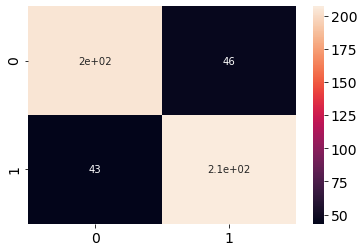

In [47]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)


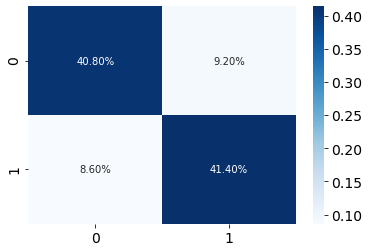

In [48]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


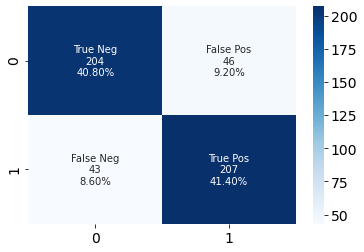

In [58]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
#categories = ['one', 'zero']

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


In [56]:
from sklearn.metrics import confusion_matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']

categories = ['one', 'zero']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')


NameError: name 'make_confusion_matrix' is not defined